In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data loading

In [2]:
train_df=pd.read_csv("data/train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
missing_mask=train_df.isna()
has_missing=missing_mask.any()


columns_with_missing = has_missing[has_missing].index.tolist()
columns_with_missing



['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:

train_df[columns_with_missing].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
def impute_masvnr(df):
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    return df

# 2. Impute FireplaceQu
def impute_fireplace(df):
    df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
    return df

# 3. Impute Basement Columns
def impute_basement(df):
    basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
    for col in basement_cols:
        df[col] = df[col].fillna('No Basement')  # Default
        df.loc[df['TotalBsmtSF'].isin([0.0, np.nan]), col] = 'No Basement' #Impute no basement
    return df

# 4. Impute Garage Columns
def impute_garage_data(df):
    garage_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
    for col in garage_cols:
        if col != 'GarageYrBlt':  # Handle GarageYrBlt separately
            df[col] = df[col].fillna('No Garage')  # Default imputation
            df.loc[(df['GarageCars'] == 0) & (df['GarageArea'] == 0), col] = 'No Garage'  # Impute 'No Garage'
        else:
             df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])
             df.loc[(df['GarageCars'] == 0) & (df['GarageArea'] == 0), col] = 0
    return df

# 5. Impute LotFrontage (using median)
def impute_lotfrontage(df):
    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
    return df

# 6. Impute Electrical (using mode)
def impute_electrical(df):
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    return df
# 7. Drop columns with too many missing values
def drop_high_missing(df):
    cols_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
    df = df.drop(cols_to_drop, axis=1)
    return df

# Apply all the imputation functions
train_df = train_df.copy() # Create a copy to avoid modifying the original DataFrame
train_df = drop_high_missing(train_df)
train_df = impute_masvnr(train_df)
train_df = impute_fireplace(train_df)
train_df = impute_basement(train_df)
train_df = impute_garage_data(train_df)
train_df = impute_lotfrontage(train_df)
train_df = impute_electrical(train_df)


# Verify that there are no more missing values
print("\nDataFrame after imputation:")
print(train_df.isna().sum())

# Display the first 20 rows of the imputed DataFrame
print("\nFirst 20 rows of imputed DataFrame:")
print(train_df.head(20))



DataFrame after imputation:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

First 20 rows of imputed DataFrame:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0    1          60       RL         65.0     8450   Pave      Reg         Lvl   
1    2          20       RL         80.0     9600   Pave      Reg         Lvl   
2    3          60       RL         68.0    11250   Pave      IR1         Lvl   
3    4          70       RL         60.0     9550   Pave      IR1         Lvl   
4    5          60       RL         84.0    14260   Pave      IR1         Lvl   
5    6          50       RL         85.0    14115   Pave      IR1         Lvl   
6    7          20       RL         75.0    10084   Pave      Reg         Lvl   
7    8          60       RL         69.0    10382   

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Data visualizations

In [9]:
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()

corr_matrix=train_df[numerical_cols].corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

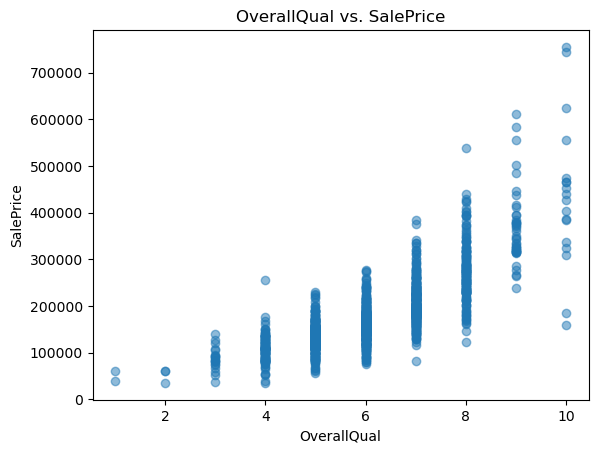

In [10]:
def plot(xfeature):
    plt.figure()#create new figure for each plot
    plt.scatter(x=train_df[xfeature],y=train_df['SalePrice'],alpha=0.5)
    plt.xlabel(xfeature)
    plt.ylabel("SalePrice")
    plt.title(f"{xfeature} vs. SalePrice")
    return None

plot("OverallQual")

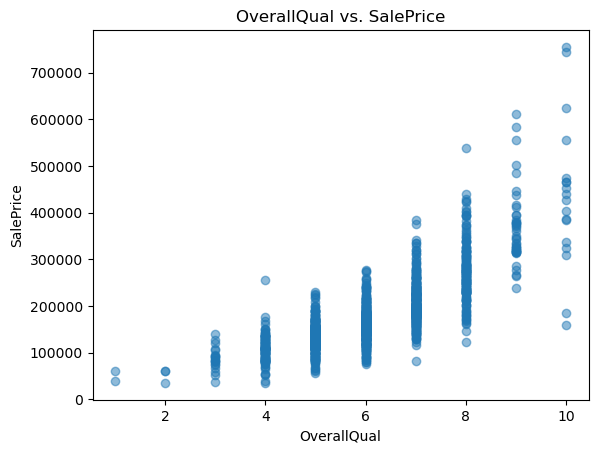

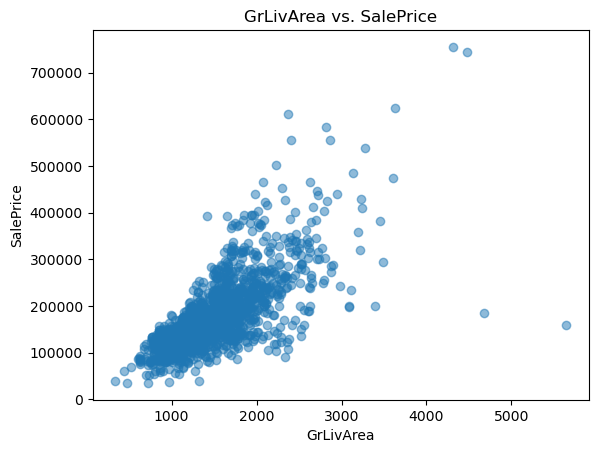

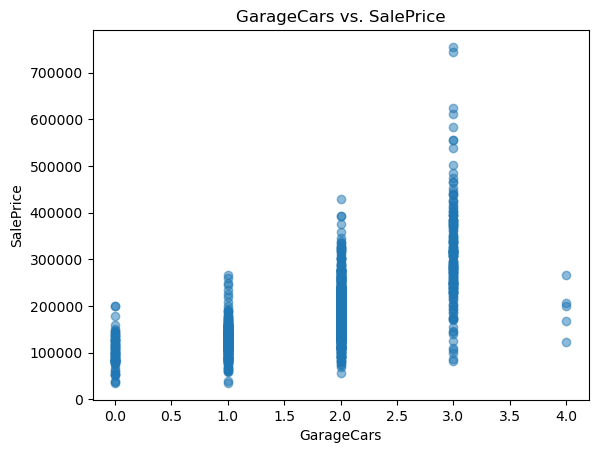

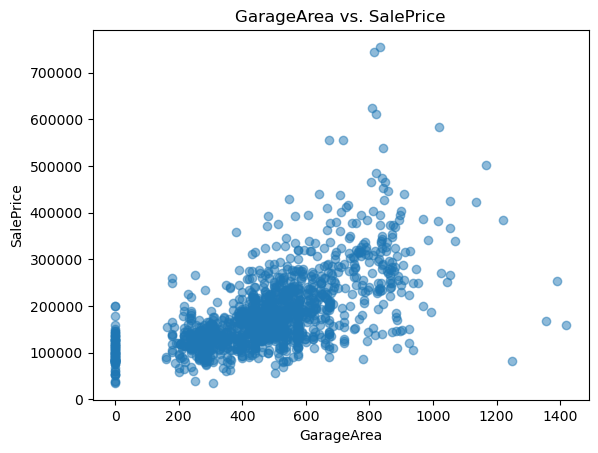

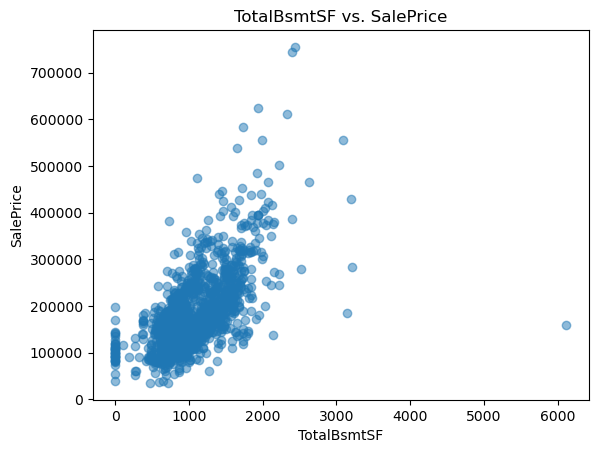

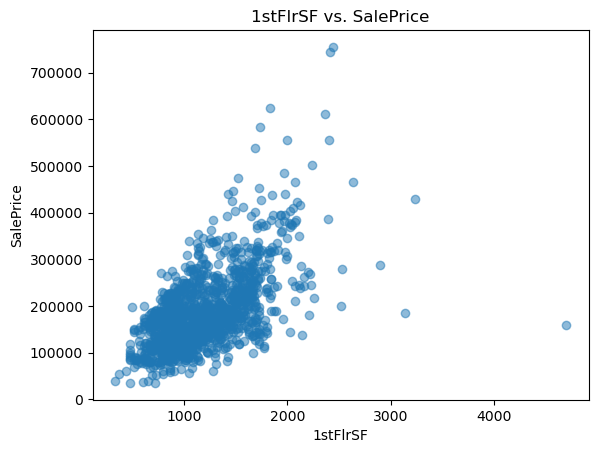

In [11]:
top_correlated_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
for feature in top_correlated_features:
    plot(feature)

# lets plot some data on basis of nature of the data


In [12]:
nominal_features = ['Neighborhood', 'HouseStyle', 'RoofStyle', 'Foundation', 'Heating', 'CentralAir', 'SaleCondition', 'BldgType', 'RoofMatl', 'GarageType', 'MSZoning', 'Condition2', 'Electrical', 'Utilities', 'LotConfig', 'MasVnrType', 'SaleType', 'Street', 'Exterior1st', 'Exterior2nd', 'Functional']
ordinal_features = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'LotShape', 'LandSlope', 'PavedDrive', 'LandContour']
continuous_features = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotFrontage', 'OpenPorchSF',  'WoodDeckSF',  'MasVnrArea',    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageArea',    'LowQualFinSF', 'ScreenPorch', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MiscVal']
discrete_features = ['BedroomAbvGr', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'KitchenAbvGr', 'MoSold']
time_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
other_features = ['MSSubClass', 'Id']
target_feature = ['SalePrice']



In [13]:
def plt_nominal(df,col):
    plt.figure(figsize=(10,8))
    sns.countplot(x=col,data=df)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')  # Rotate labels if needed
    plt.show()

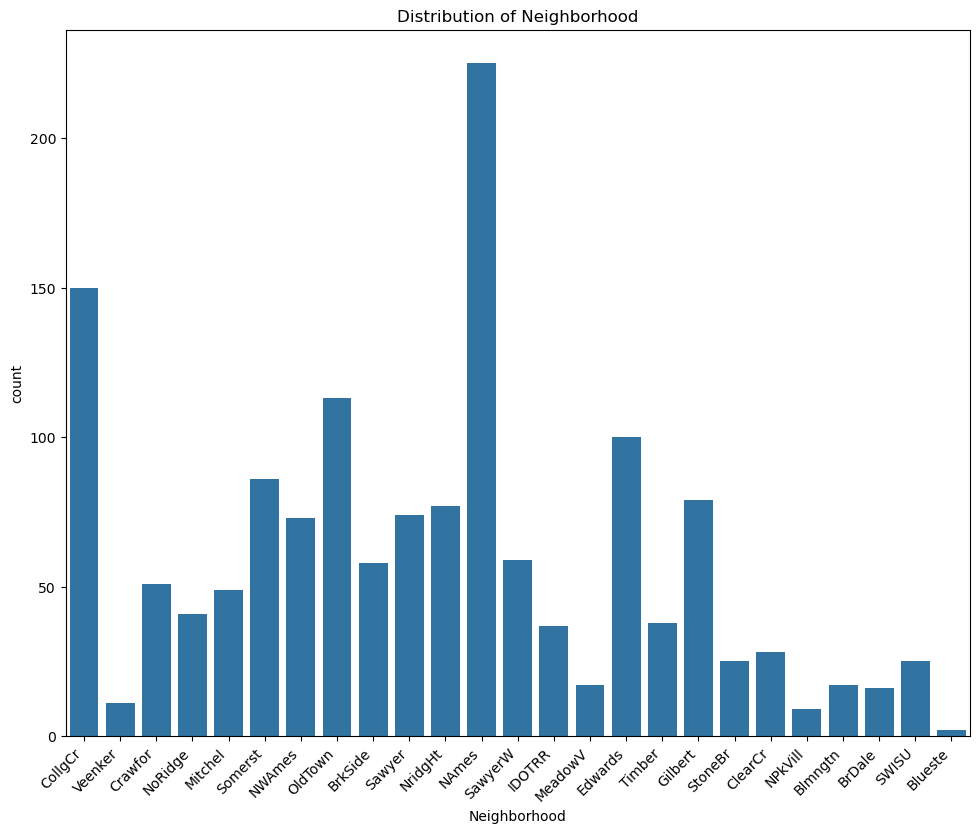

In [14]:
plt_nominal(train_df,'Neighborhood')

In [15]:
def plot_ordinal(df, col):
    """Bar plot for ordinal features (preserving order)."""
    plt.figure(figsize=(10, 6))
    #  You might need to define a specific order for the categories.
    #  If you have a list like:  category_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
    #  Use that in the sns.countplot.
    plt.bar(height=df['SalePrice'], x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

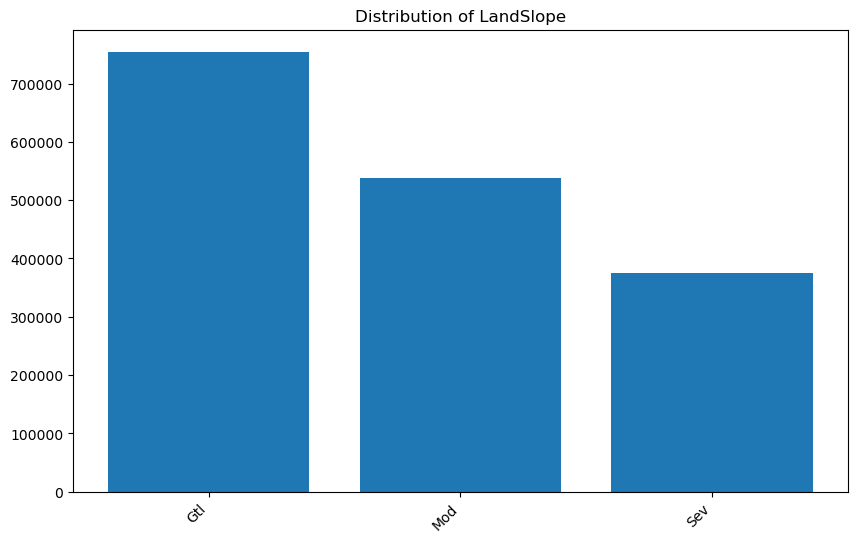

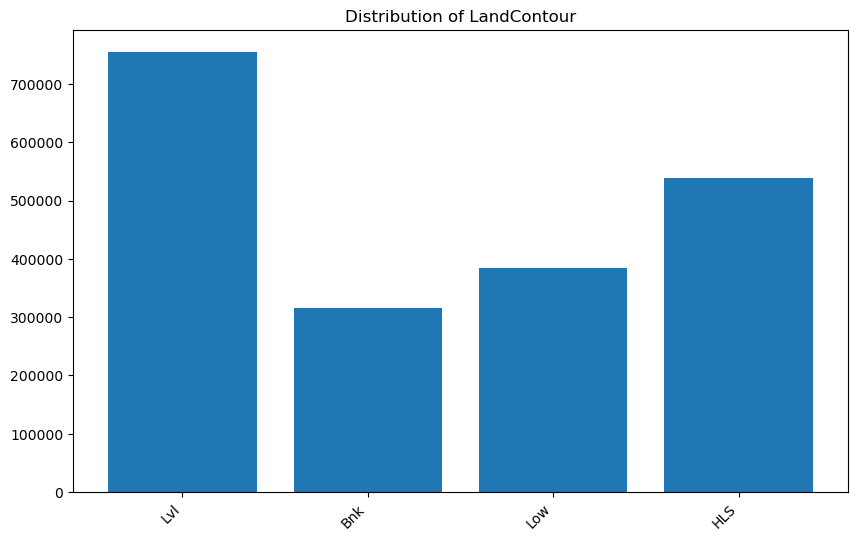

In [16]:
plot_ordinal(train_df,'LandSlope')
plot_ordinal(train_df,'LandContour')



In [17]:
train_df["OverallQual"].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [18]:
def plot_discrete(df, col):
    """Bar plot for discrete features."""
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

def plot_time(df, col):
    """Histogram for time features (e.g., year)."""
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=df[col].nunique())  # Adjust bins as needed
    plt.title(f'Distribution of {col}')
    plt.show()

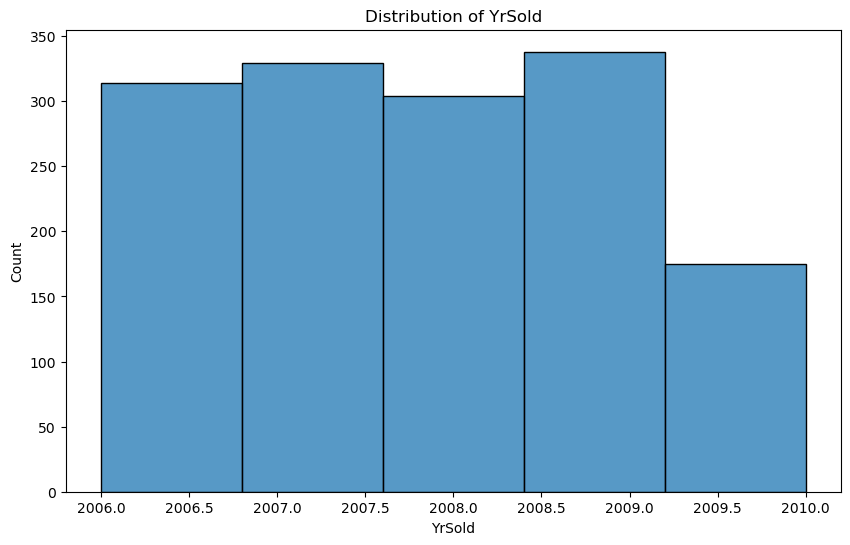

In [19]:
plot_time(train_df,'YrSold')

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
all_cols_train = set(train_df.columns.tolist())
numerical_cols_set = set(numerical_cols)

non_numerical_cols = list(all_cols_train - numerical_cols_set)
non_numerical_cols

['Neighborhood',
 'SaleCondition',
 'Condition1',
 'BsmtQual',
 'BldgType',
 'ExterQual',
 'SaleType',
 'ExterCond',
 'MasVnrType',
 'Foundation',
 'LandContour',
 'BsmtExposure',
 'PavedDrive',
 'BsmtCond',
 'GarageFinish',
 'HouseStyle',
 'LandSlope',
 'LotConfig',
 'FireplaceQu',
 'RoofMatl',
 'MSZoning',
 'LotShape',
 'Utilities',
 'HeatingQC',
 'BsmtFinType1',
 'Functional',
 'Exterior1st',
 'RoofStyle',
 'CentralAir',
 'Street',
 'BsmtFinType2',
 'Condition2',
 'Heating',
 'Exterior2nd',
 'KitchenQual',
 'GarageType',
 'Electrical',
 'GarageCond',
 'GarageQual']

In [22]:
# from sklearn.model_selection import train_test_split
# x=train_df.drop("SalePrice",axis=1)
# y=train_df["SalePrice"]

# x_train,x_com,y_train,y_com=train_test_split(x,y,train_size=0.7,random_state=42)

# x_val,x_test,y_val,y_test=train_test_split(x_com,y_com,train_size=0.5,random_state=42)
# print(f"Shape of x_train: {x_train.shape}")
# print(f"Shape of x_val: {x_val.shape}")
# print(f"Shape of x_test: {x_test.shape}")
# print(f"Shape of y_train: {y_train.shape}")
# print(f"Shape of y_val: {y_val.shape}")
# print(f"Shape of y_test: {y_test.shape}")

In [23]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

if ['SalePrice'] in numerical_cols:
    numerical_cols.drop(['SalePrice'])
encoder=OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features=encoder.fit_transform(train_df[non_numerical_cols])
encoded_feature_names=encoder.get_feature_names_out(non_numerical_cols)
encoded_df = pd.DataFrame(encoded_features, index=train_df.index, columns=encoded_feature_names)
encoded_df.head()

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
train_df_processed = train_df.drop(non_numerical_cols, axis=1)

# Concatenate the encoded features with the remaining (original numerical) features
train_df_processed = pd.concat([train_df_processed, encoded_df], axis=1)
train_df_processed.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
x = train_df_processed.drop("SalePrice", axis=1)
y = train_df_processed["SalePrice"]
numerical_cols_to_scale = [col for col in numerical_cols if col in x.columns]

scaler = StandardScaler()
x[numerical_cols_to_scale] = scaler.fit_transform(x[numerical_cols_to_scale])


In [26]:
x_train.info()

NameError: name 'x_train' is not defined

In [27]:
from sklearn.decomposition import PCA
x_train, x_com, y_train, y_com = train_test_split(x, y, train_size=0.7, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_com, y_com, train_size=0.5, random_state=42)

# Standardize the numerical features *after* splitting
numerical_cols_to_scale = [col for col in numerical_cols if col in x_train.columns]
scaler = StandardScaler()
x_train[numerical_cols_to_scale] = scaler.fit_transform(x_train[numerical_cols_to_scale])
x_val[numerical_cols_to_scale] = scaler.transform(x_val[numerical_cols_to_scale]) # Use the same scaler
x_test[numerical_cols_to_scale] = scaler.transform(x_test[numerical_cols_to_scale]) # Use the same scaler

# Apply PCA
n_components = 95# Choose the number of principal components
pca = PCA(n_components=n_components)

# Fit PCA on the training data and transform it
x_train_pca = pca.fit_transform(x_train)

# Transform the validation and test sets using the fitted PCA
x_val_pca = pca.transform(x_val)
x_test_pca = pca.transform(x_test)

print("Shape of x_train_pca:", x_train_pca.shape)
print("Shape of x_val_pca:", x_val_pca.shape)
print("Shape of x_test_pca:", x_test_pca.shape)

Shape of x_train_pca: (1021, 95)
Shape of x_val_pca: (219, 95)
Shape of x_test_pca: (220, 95)


In [28]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1021 entries, 1452 to 1126
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1021 non-null   int64
dtypes: int64(1)
memory usage: 16.0 KB


In [29]:
#training the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_mod=LinearRegression()
lr_mod.fit(x_train_pca,y_train)
predictions_val_original = lr_mod.predict(x_val_pca)
predictions_test_original = lr_mod.predict(x_test_pca)
rmse_val_pca = np.sqrt(mean_squared_error(y_val, predictions_val_original))

print(f"Validation RMSE (original features): {rmse_val_pca}")


Validation RMSE (original features): 25282.363117596324


In [30]:
import pandas as pd

# Assuming y_train is your Pandas Series containing SalePrice
print(y_train.describe())

count      1021.000000
mean     181319.855044
std       77655.161567
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      215000.000000
max      745000.000000
Name: SalePrice, dtype: float64


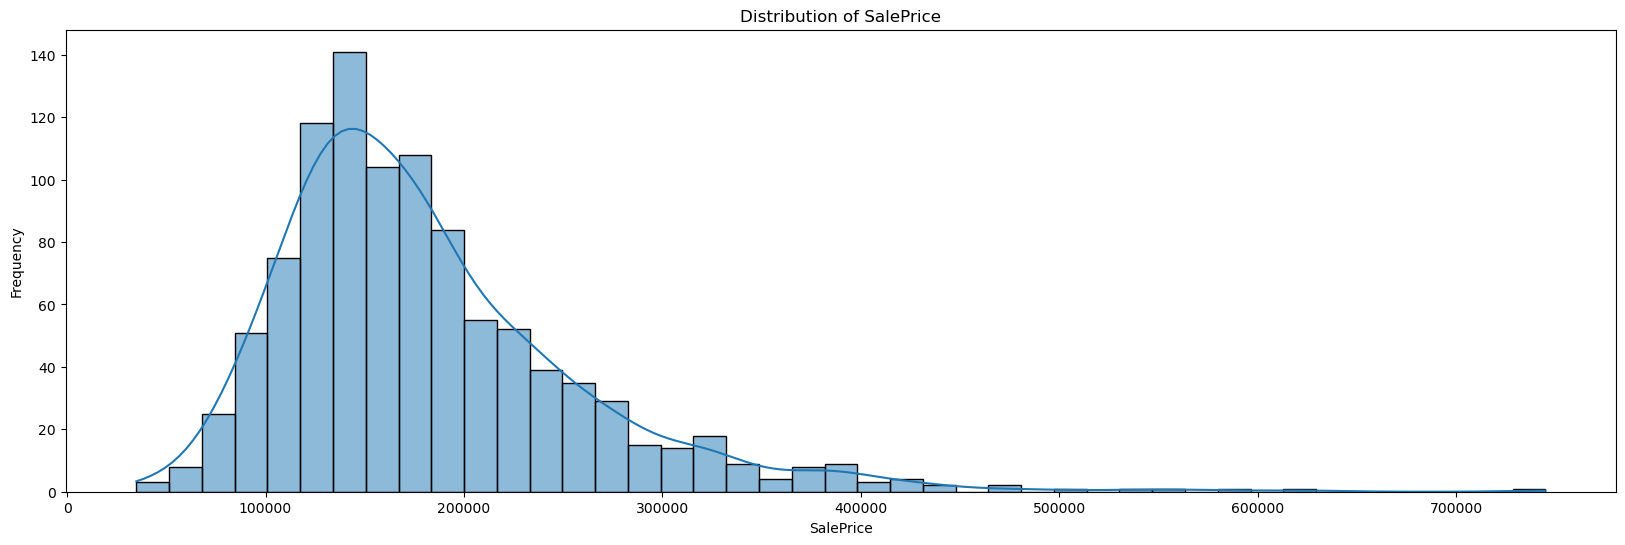

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train is your Pandas Series
plt.figure(figsize=(20, 6))
sns.histplot(y_train, kde=True)  # kde=True adds a kernel density estimate line
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_root_mean_squared_error')


grid_search_ridge.fit(x_train_pca, y_train)
best_ridge = grid_search_ridge.best_estimator_
predictions_val_ridge = best_ridge.predict(x_val_pca)
rmse_val_ridge = np.sqrt(mean_squared_error(y_val, predictions_val_ridge))

# Print the best alpha value and the corresponding RMSE
print(f"Best Ridge Alpha: {grid_search_ridge.best_params_['alpha']}")
print(f"Validation RMSE with Ridge Regression (n_components={x_train_pca.shape[1]}): {rmse_val_ridge}")


Best Ridge Alpha: 100.0
Validation RMSE with Ridge Regression (n_components=95): 23972.34504193505


In [34]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(
    n_estimators=300,      # Increase the number of trees
    max_features='sqrt',   # Consider a fraction of features at each split
    max_depth=15,          # Allow trees to grow deeper
    min_samples_split=5,   # Minimum samples to split an internal node
    min_samples_leaf=3,    # Minimum samples at a leaf node
    random_state=42,       # For reproducibility
    n_jobs=-1              # Use all available cores
)

model.fit(x_train_pca,y_train)
predict_val_rf=model.predict(x_val_pca)
rmse_val_rf=np.sqrt(mean_squared_error(y_val,predict_val_rf))
print(f"Validation RMSE with Random Forest Regression (n_components={x_train_pca.shape[1]}): {rmse_val_rf}")


Validation RMSE with Random Forest Regression (n_components=95): 39571.16252733537


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define a parameter grid to search
param_grid_rf = {
    'n_estimators': [200, 300, 400],
    'max_features': ['sqrt', 0.5],  # Try a fraction as well
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'n_jobs': [-1],
    'random_state': [42]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid_rf,
                           cv=3,  # Consider increasing folds to 5 if computation allows
                           scoring='neg_root_mean_squared_error',
                           verbose=2)

# Fit GridSearchCV to your PCA-transformed training data
grid_search_rf.fit(x_train, y_train)

# Get the best hyperparameters found by GridSearchCV
best_params_rf = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the validation set using the best model
predict_val_rf_tuned = best_rf_model.predict(x_val)

# Evaluate the performance of the tuned model
rmse_val_rf_tuned = np.sqrt(mean_squared_error(y_val, predict_val_rf_tuned))
print(f"Validation RMSE with Tuned Random Forest (n_components={x_train_pca.shape[1]}): {rmse_val_rf_tuned}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42; total time=   0.8s
[CV] END max_depth=None, max_features

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Log-transform the target variable
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [200, 300, 400],
    'max_features': ['sqrt', 0.5],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'n_jobs': [-1],
    'random_state': [42]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid_rf,
                           cv=3,
                           scoring='neg_root_mean_squared_error',
                           verbose=2)

# Fit GridSearchCV to the training data with the log-transformed target
grid_search_rf.fit(x_train, y_train_log)

# Get the best hyperparameters found by GridSearchCV
best_params_rf = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the validation set
predict_val_rf_log = best_rf_model.predict(x_val)

# Evaluate the performance using RMSE on the log-transformed values
rmse_val_log_rf_tuned = np.sqrt(mean_squared_error(y_val_log, predict_val_rf_log))
print(f"Validation RMSE (log-transformed) with Tuned Random Forest: {rmse_val_log_rf_tuned}")

# For final submission, remember to inverse transform predictions:
# predictions_original_scale = np.expm1(predict_test_log)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42; total time=   0.7s
[CV] END max_depth=None, max_features

In [38]:
from xgboost import XGBRegressor

#created a grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 0.1, 0.01]
}
#initialize xgboost regressor
xgb_mod=XGBRegressor(objective="reg:squarederror",random_state=42,n_jobs=-1)
#initialize gridsearchCV
grid_search_xgb=GridSearchCV(estimator=xgb_mod,param_grid=param_grid_xgb,scoring='neg_root_mean_squared_error',
                           verbose=2,cv=3)

#fitting the gridcv model
grid_search_xgb.fit(x_train,y_train_log)
#get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f"Best Hyperparameters for XGBoost: {best_params_xgb}")
#get the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the validation set
predict_val_xgb_log = best_xgb_model.predict(x_val)

# Evaluate the performance using RMSE on the log-transformed values
rmse_val_log_xgb_tuned = np.sqrt(mean_squared_error(y_val_log, predict_val_xgb_log))
print(f"Validation RMSE (log-transformed) with Tuned XGBoost: {rmse_val_log_xgb_tuned}")


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.4s
[CV] END colsample_bytr

In [39]:
from xgboost import XGBRegressor
import numpy as np

# Best hyperparameters found by GridSearchCV
best_params_xgb = {
    'colsample_bytree': 0.7,
    'gamma': 0,
    'learning_rate': 0.05,
    'max_depth': 3,
    'n_estimators': 300,
    'reg_alpha': 0,
    'reg_lambda': 0.01,
    'subsample': 0.7
}

# Initialize the XGBoost Regressor with the best hyperparameters
final_xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    **best_params_xgb  # Pass the best hyperparameters as keyword arguments
)

# Train the final model on the entire training data with the log-transformed target
final_xgb_model.fit(x_train, np.log1p(y_train))

print("Final XGBoost model has been trained with the best hyperparameters.")

# Now you can use this 'final_xgb_model' to make predictions on your test data
# and create the submission file as shown in the previous response.

Final XGBoost model has been trained with the best hyperparameters.


In [40]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 1226 to 1159
Columns: 286 entries, Id to GarageQual_TA
dtypes: float64(286)
memory usage: 493.3 KB


In [41]:
kaggle_test=pd.read_csv('data/test.csv')
kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [44]:
missing_mask=kaggle_test.isna()
has_missing=missing_mask.any()


columns_with_missing = has_missing[has_missing].index.tolist()
columns_with_missing
kaggle_test[columns_with_missing].isna().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [45]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 1452 to 1126
Columns: 286 entries, Id to GarageQual_TA
dtypes: float64(286)
memory usage: 2.2 MB


In [46]:
def impute_masvnr(df):
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    return df

# 2. Impute FireplaceQu
def impute_fireplace(df):
    df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
    return df

# 3. Impute Basement Columns
def impute_basement(df):
    basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
    for col in basement_cols:
        df[col] = df[col].fillna('No Basement')  # Default
        df.loc[df['TotalBsmtSF'].isin([0.0, np.nan]), col] = 'No Basement' #Impute no basement
    return df

# 4. Impute Garage Columns
def impute_garage_data(df):
    garage_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
    for col in garage_cols:
        if col != 'GarageYrBlt':  # Handle GarageYrBlt separately
            df[col] = df[col].fillna('No Garage')  # Default imputation
            df.loc[(df['GarageCars'] == 0) & (df['GarageArea'] == 0), col] = 'No Garage'  # Impute 'No Garage'
        else:
             df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])
             df.loc[(df['GarageCars'] == 0) & (df['GarageArea'] == 0), col] = 0
    return df

# 5. Impute LotFrontage (using median)
def impute_lotfrontage(df):
    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
    return df

# 6. Impute Electrical (using mode)
def impute_electrical(df):
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    return df
# 7. Drop columns with too many missing values
def drop_high_missing(df):
    cols_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
    df = df.drop(cols_to_drop, axis=1)
    return df
kaggle_test_imputed = kaggle_test.copy()

# Apply the imputation functions to kaggle_test_imputed
kaggle_test_imputed = drop_high_missing(kaggle_test_imputed)
kaggle_test_imputed = impute_masvnr(kaggle_test_imputed)
kaggle_test_imputed = impute_fireplace(kaggle_test_imputed)
kaggle_test_imputed = impute_basement(kaggle_test_imputed)
kaggle_test_imputed = impute_garage_data(kaggle_test_imputed)

# Impute LotFrontage using the median from the *original training data*
kaggle_test_imputed['LotFrontage'] = kaggle_test_imputed['LotFrontage'].fillna(train_df['LotFrontage'].median())

# Impute Electrical using the mode from the *original training data*
kaggle_test_imputed['Electrical'] = kaggle_test_imputed['Electrical'].fillna(train_df['Electrical'].mode()[0])


# Verify that there are no more missing values in the imputed Kaggle test data
print("\nKaggle Test DataFrame after imputation:")
print(kaggle_test_imputed.isna().sum())

# Display the first 20 rows of the imputed Kaggle test DataFrame
print("\nFirst 20 rows of imputed Kaggle Test DataFrame:")
print(kaggle_test_imputed.head(20))


Kaggle Test DataFrame after imputation:
Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 76, dtype: int64

First 20 rows of imputed Kaggle Test DataFrame:
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0   1461          20       RH         80.0    11622   Pave      Reg   
1   1462          20       RL         81.0    14267   Pave      IR1   
2   1463          60       RL         74.0    13830   Pave      IR1   
3   1464          60       RL         78.0     9978   Pave      IR1   
4   1465         120       RL         43.0     5005   Pave      IR1   
5   1466          60       RL         75.0    10000   Pave      IR1   
6   1467          20       RL         69.0     7980   Pave      IR1   
7   1468          60       RL         63.0     8402   Pave      IR1   
8   1469          20       RL        

In [48]:
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
non_numerical_cols = train_df.select_dtypes(exclude=np.number).columns.tolist()

# Ensure 'SalePrice' is not in numerical_cols (it's not in the test data, but good practice)
if 'SalePrice' in numerical_cols:
    numerical_cols.remove('SalePrice')

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(train_df[non_numerical_cols])  # FIT ON TRAINING DATA
encoded_features_test = encoder.transform(kaggle_test_imputed[non_numerical_cols])
encoded_feature_names = encoder.get_feature_names_out(non_numerical_cols)
encoded_df_test = pd.DataFrame(encoded_features_test, index=kaggle_test_imputed.index, columns=encoded_feature_names)

# 3. Drop original non-numerical columns
kaggle_test_processed = kaggle_test_imputed.drop(non_numerical_cols, axis=1)

# 4. Concatenate encoded features with the remaining numerical features
kaggle_test_processed = pd.concat([kaggle_test_processed, encoded_df_test], axis=1)



# 5. Scale numerical columns
#    - Use the *same* scaler fitted on the training data (x)
numerical_cols_to_scale = [col for col in numerical_cols if col in kaggle_test_processed.columns] #Important to prevent errors.
if numerical_cols_to_scale:
    scaler = StandardScaler()
    #scaler.fit(x[numerical_cols_to_scale]) # NO FIT HERE
    scaler.fit(train_df[numerical_cols_to_scale])
    kaggle_test_processed[numerical_cols_to_scale] = scaler.transform(kaggle_test_processed[numerical_cols_to_scale])
    
# Print shape of processed test data to verify
print("\nShape of processed Kaggle test data (x_kaggle_test):", kaggle_test_processed.shape)

# Display the first 20 rows of the processed Kaggle test DataFrame
print("\nFirst 20 rows of processed Kaggle Test DataFrame:")
print(kaggle_test_processed.head(20))



Shape of processed Kaggle test data (x_kaggle_test): (1459, 286)

First 20 rows of processed Kaggle Test DataFrame:
          Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0   1.733238   -0.872563     0.460320  0.110763    -0.795151     0.381743   
1   1.735610   -0.872563     0.505733  0.375850    -0.071836     0.381743   
2   1.737983    0.073375     0.187842  0.332053    -0.795151    -0.517200   
3   1.740356    0.073375     0.369494 -0.054002    -0.071836     0.381743   
4   1.742728    1.492282    -1.219961 -0.552407     1.374795    -0.517200   
5   1.745101    0.073375     0.233255 -0.051798    -0.071836    -0.517200   
6   1.747474   -0.872563    -0.039223 -0.254246    -0.071836     1.280685   
7   1.749846    0.073375    -0.311701 -0.211952    -0.071836    -0.517200   
8   1.752219   -0.872563     0.687385 -0.034158     0.651479    -0.517200   
9   1.754592   -0.872563     0.006190 -0.212153    -1.518467    -0.517200   
10  1.756964    1.492282    -1.99198

In [49]:
kaggle_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 286 entries, Id to SaleCondition_Partial
dtypes: float64(286)
memory usage: 3.2 MB


In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil